In [1]:
import numpy as np
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

<h2>1. Create the structure of the Bayes net (Figure 2.a)</h2>

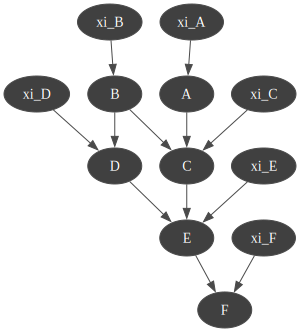

In [2]:
XXX = {'A': 2, 'B': 2, 'C': 4, 'D': 3, 'E': 3, 'F': 3}
bn = gum.BayesNet()

for X in XXX:
    bn.add(gum.LabelizedVariable('xi_' + X,'',4))
    bn.add(gum.LabelizedVariable(X,'',XXX[X]))

for X in XXX:
    bn.addArc('xi_' + X, X)
arcs = [('B','C'), ('A','C'), ('B','D'), ('D','E'), ('C','E'), ('E','F')]
for tail, head in arcs:
    bn.addArc(tail, head)
    
gnb.showBN(bn, size=12)

<h2>2. Assign the probability distributions to the disturbance variables</h2>

In [3]:
# 
bn.cpt('xi_A')[:] = [0.2, 0.1, 0.3, 0.4]
bn.cpt('xi_B')[:] = [0.2, 0.4, 0.3, 0.1]
bn.cpt('xi_C')[:] = [0.3, 0.3, 0.2, 0.2]
bn.cpt('xi_D')[:] = [0.5, 0.3, 0.1, 0.1]
bn.cpt('xi_E')[:] = [0.1, 0.2, 0.3, 0.4]
bn.cpt('xi_F')[:] = [0.2, 0.3, 0.3, 0.2]

<h2>3. Assign to probability distributions to the nodes of <b>X</b></h2>

In [4]:
cpt_A = np.array([[1, 1, 0, 0], [0, 0, 1, 1]])
bn.cpt('A')[:] = cpt_A.T
bn.cpt('A')

(pyAgrum.Potential<double>@0x560ca248bec0) 
      ||  A                |
xi_A  ||0        |1        |
------||---------|---------|
0     || 1.0000  | 0.0000  |
1     || 1.0000  | 0.0000  |
2     || 0.0000  | 1.0000  |
3     || 0.0000  | 1.0000  |

In [5]:
cpt_B = np.array([[0, 1, 0, 1], [1, 0, 1, 0]])
bn.cpt('B')[:] = cpt_B.T
bn.cpt('B')

(pyAgrum.Potential<double>@0x560ca2697780) 
      ||  B                |
xi_B  ||0        |1        |
------||---------|---------|
0     || 0.0000  | 1.0000  |
1     || 1.0000  | 0.0000  |
2     || 0.0000  | 1.0000  |
3     || 1.0000  | 0.0000  |

In [6]:
cpt_C = np.array([[1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0],
                  [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1]])
bn.cpt('C').fillWith(cpt_C.T.flatten().astype(float))
bn.cpt('C')

(pyAgrum.Potential<double>@0x560ca265a740) 
                    ||  C                                    |
xi_C  |B     |A     ||0        |1        |2        |3        |
------|------|------||---------|---------|---------|---------|
0     |0     |0     || 1.0000  | 0.0000  | 0.0000  | 0.0000  |
1     |0     |0     || 1.0000  | 0.0000  | 0.0000  | 0.0000  |
2     |0     |0     || 0.0000  | 0.0000  | 1.0000  | 0.0000  |
3     |0     |0     || 0.0000  | 0.0000  | 1.0000  | 0.0000  |
0     |1     |0     || 1.0000  | 0.0000  | 0.0000  | 0.0000  |
1     |1     |0     || 1.0000  | 0.0000  | 0.0000  | 0.0000  |
[...4 more line(s) ...]
2     |0     |1     || 0.0000  | 0.0000  | 1.0000  | 0.0000  |
3     |0     |1     || 0.0000  | 0.0000  | 1.0000  | 0.0000  |
0     |1     |1     || 0.0000  | 1.0000  | 0.0000  | 0.0000  |
1     |1     |1     || 0.0000  | 1.0000  | 0.0000  | 0.0000  |
2     |1     |1     || 0.0000  | 0.0000  | 0.0000  | 1.0000  |
3     |1     |1     || 0.0000  | 0.0000  | 0.0000  | 1.0000  |

In [7]:
cpt_D = np.array([[1, 0, 1, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0],
                  [0, 1, 0, 1, 1, 0, 1, 1]])
bn.cpt('D').fillWith(cpt_D.T.flatten().astype(float))
bn.cpt('D')

(pyAgrum.Potential<double>@0x560ca24c4eb0) 
             ||  D                          |
xi_D  |B     ||0        |1        |2        |
------|------||---------|---------|---------|
0     |0     || 1.0000  | 0.0000  | 0.0000  |
1     |0     || 0.0000  | 0.0000  | 1.0000  |
2     |0     || 1.0000  | 0.0000  | 0.0000  |
3     |0     || 0.0000  | 0.0000  | 1.0000  |
0     |1     || 0.0000  | 0.0000  | 1.0000  |
1     |1     || 0.0000  | 1.0000  | 0.0000  |
2     |1     || 0.0000  | 0.0000  | 1.0000  |
3     |1     || 0.0000  | 0.0000  | 1.0000  |

In [8]:
cpt_E = np.array([[1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
                   0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
                   0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1]])
bn.cpt('E').fillWith(cpt_E.T.flatten().astype(float))
bn.cpt('E')

(pyAgrum.Potential<double>@0x560ca2771fc0) 
                    ||  E                          |
xi_E  |D     |C     ||0        |1        |2        |
------|------|------||---------|---------|---------|
0     |0     |0     || 1.0000  | 0.0000  | 0.0000  |
1     |0     |0     || 1.0000  | 0.0000  | 0.0000  |
2     |0     |0     || 0.0000  | 0.0000  | 1.0000  |
3     |0     |0     || 0.0000  | 0.0000  | 1.0000  |
0     |1     |0     || 1.0000  | 0.0000  | 0.0000  |
1     |1     |0     || 1.0000  | 0.0000  | 0.0000  |
[...36 more line(s) ...]
2     |1     |3     || 0.0000  | 1.0000  | 0.0000  |
3     |1     |3     || 0.0000  | 1.0000  | 0.0000  |
0     |2     |3     || 0.0000  | 0.0000  | 1.0000  |
1     |2     |3     || 0.0000  | 0.0000  | 1.0000  |
2     |2     |3     || 0.0000  | 0.0000  | 1.0000  |
3     |2     |3     || 0.0000  | 0.0000  | 1.0000  |

In [9]:
cpt_F = np.array([[1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
                  [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                  [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1]])
bn.cpt('F').fillWith(cpt_F.T.flatten().astype(float))
bn.cpt('F')

(pyAgrum.Potential<double>@0x560ca2773910) 
             ||  F                          |
xi_F  |E     ||0        |1        |2        |
------|------||---------|---------|---------|
0     |0     || 1.0000  | 0.0000  | 0.0000  |
1     |0     || 0.0000  | 1.0000  | 0.0000  |
2     |0     || 0.0000  | 0.0000  | 1.0000  |
3     |0     || 0.0000  | 0.0000  | 1.0000  |
0     |1     || 1.0000  | 0.0000  | 0.0000  |
1     |1     || 0.0000  | 0.0000  | 1.0000  |
2     |1     || 0.0000  | 0.0000  | 1.0000  |
3     |1     || 0.0000  | 0.0000  | 1.0000  |
0     |2     || 1.0000  | 0.0000  | 0.0000  |
1     |2     || 0.0000  | 1.0000  | 0.0000  |
2     |2     || 0.0000  | 0.0000  | 1.0000  |
3     |2     || 0.0000  | 0.0000  | 1.0000  |

<h2>4. Marginalize out the disturbance variables</h2>

In [10]:
XP_A = bn.cpt('A') * bn.cpt('xi_A')  # compute P(A,xi_A) = f_A(xi_A) x P(xi_A)
XP_A

(pyAgrum.Potential<double>@0x560ca20fcd90) 
      ||  xi_A                                 |
A     ||0        |1        |2        |3        |
------||---------|---------|---------|---------|
0     || 0.2000  | 0.1000  | 0.0000  | 0.0000  |
1     || 0.0000  | 0.0000  | 0.3000  | 0.4000  |

In [11]:
P_A = XP_A.sumOut('xi_A')  # compute sum_{xi_A} P(A, xi_A)
P_A

(pyAgrum.Potential<double>@0x560ca2773180) 
  A                |
0        |1        |
---------|---------|
 0.3000  | 0.7000  |

In [12]:
XP_B = bn.cpt('B') * bn.cpt('xi_B')
XP_B

(pyAgrum.Potential<double>@0x560ca1af2900) 
      ||  xi_B                                 |
B     ||0        |1        |2        |3        |
------||---------|---------|---------|---------|
0     || 0.0000  | 0.4000  | 0.0000  | 0.1000  |
1     || 0.2000  | 0.0000  | 0.3000  | 0.0000  |

In [13]:
P_B = XP_B.sumOut('xi_B')
P_B

(pyAgrum.Potential<double>@0x560ca2773f30) 
  B                |
0        |1        |
---------|---------|
 0.5000  | 0.5000  |

In [14]:
XP_C = (bn.cpt('C') * bn.cpt('xi_C')).reorganize(['C', 'xi_C', 'B', 'A'])
XP_C

(pyAgrum.Potential<double>@0x560ca22c0ed0) 
                    ||  C                                    |
xi_C  |B     |A     ||0        |1        |2        |3        |
------|------|------||---------|---------|---------|---------|
0     |0     |0     || 0.3000  | 0.0000  | 0.0000  | 0.0000  |
1     |0     |0     || 0.3000  | 0.0000  | 0.0000  | 0.0000  |
2     |0     |0     || 0.0000  | 0.0000  | 0.2000  | 0.0000  |
3     |0     |0     || 0.0000  | 0.0000  | 0.2000  | 0.0000  |
0     |1     |0     || 0.3000  | 0.0000  | 0.0000  | 0.0000  |
1     |1     |0     || 0.3000  | 0.0000  | 0.0000  | 0.0000  |
[...4 more line(s) ...]
2     |0     |1     || 0.0000  | 0.0000  | 0.2000  | 0.0000  |
3     |0     |1     || 0.0000  | 0.0000  | 0.2000  | 0.0000  |
0     |1     |1     || 0.0000  | 0.3000  | 0.0000  | 0.0000  |
1     |1     |1     || 0.0000  | 0.3000  | 0.0000  | 0.0000  |
2     |1     |1     || 0.0000  | 0.0000  | 0.0000  | 0.2000  |
3     |1     |1     || 0.0000  | 0.0000  | 0.0000  | 0.2000  |

In [15]:
P_C = XP_C.sumOut('xi_C')
P_C

(pyAgrum.Potential<double>@0x560ca2250be0) 
             ||  C                                    |
B     |A     ||0        |1        |2        |3        |
------|------||---------|---------|---------|---------|
0     |0     || 0.6000  | 0.0000  | 0.4000  | 0.0000  |
1     |0     || 0.6000  | 0.0000  | 0.0000  | 0.4000  |
0     |1     || 0.0000  | 0.6000  | 0.4000  | 0.0000  |
1     |1     || 0.0000  | 0.6000  | 0.0000  | 0.4000  |

In [16]:
XP_D = (bn.cpt('D') * bn.cpt('xi_D')).reorganize(['D', 'xi_D', 'B'])
XP_D

(pyAgrum.Potential<double>@0x560ca23ece30) 
             ||  D                          |
xi_D  |B     ||0        |1        |2        |
------|------||---------|---------|---------|
0     |0     || 0.5000  | 0.0000  | 0.0000  |
1     |0     || 0.0000  | 0.0000  | 0.3000  |
2     |0     || 0.1000  | 0.0000  | 0.0000  |
3     |0     || 0.0000  | 0.0000  | 0.1000  |
0     |1     || 0.0000  | 0.0000  | 0.5000  |
1     |1     || 0.0000  | 0.3000  | 0.0000  |
2     |1     || 0.0000  | 0.0000  | 0.1000  |
3     |1     || 0.0000  | 0.0000  | 0.1000  |

In [17]:
P_D = XP_D.sumOut('xi_D')
P_D

(pyAgrum.Potential<double>@0x560ca266efe0) 
      ||  D                          |
B     ||0        |1        |2        |
------||---------|---------|---------|
0     || 0.6000  | 0.0000  | 0.4000  |
1     || 0.0000  | 0.3000  | 0.7000  |

In [18]:
XP_E = (bn.cpt('E') * bn.cpt('xi_E')).reorganize(['E', 'xi_E', 'D', 'C'])
XP_E

(pyAgrum.Potential<double>@0x560ca2671170) 
                    ||  E                          |
xi_E  |D     |C     ||0        |1        |2        |
------|------|------||---------|---------|---------|
0     |0     |0     || 0.1000  | 0.0000  | 0.0000  |
1     |0     |0     || 0.2000  | 0.0000  | 0.0000  |
2     |0     |0     || 0.0000  | 0.0000  | 0.3000  |
3     |0     |0     || 0.0000  | 0.0000  | 0.4000  |
0     |1     |0     || 0.1000  | 0.0000  | 0.0000  |
1     |1     |0     || 0.2000  | 0.0000  | 0.0000  |
[...36 more line(s) ...]
2     |1     |3     || 0.0000  | 0.3000  | 0.0000  |
3     |1     |3     || 0.0000  | 0.4000  | 0.0000  |
0     |2     |3     || 0.0000  | 0.0000  | 0.1000  |
1     |2     |3     || 0.0000  | 0.0000  | 0.2000  |
2     |2     |3     || 0.0000  | 0.0000  | 0.3000  |
3     |2     |3     || 0.0000  | 0.0000  | 0.4000  |

In [19]:
P_E = XP_E.sumOut('xi_E')
P_E

(pyAgrum.Potential<double>@0x560ca277e7e0) 
             ||  E                          |
D     |C     ||0        |1        |2        |
------|------||---------|---------|---------|
0     |0     || 0.3000  | 0.0000  | 0.7000  |
1     |0     || 0.3000  | 0.0000  | 0.7000  |
2     |0     || 0.3000  | 0.0000  | 0.7000  |
0     |1     || 0.0000  | 0.0000  | 1.0000  |
1     |1     || 0.0000  | 1.0000  | 0.0000  |
2     |1     || 0.0000  | 0.0000  | 1.0000  |
0     |2     || 0.3000  | 0.0000  | 0.7000  |
1     |2     || 0.3000  | 0.0000  | 0.7000  |
2     |2     || 0.3000  | 0.0000  | 0.7000  |
0     |3     || 0.0000  | 0.0000  | 1.0000  |
1     |3     || 0.0000  | 1.0000  | 0.0000  |
2     |3     || 0.0000  | 0.0000  | 1.0000  |

In [20]:
XP_F = (bn.cpt('F') * bn.cpt('xi_F')).reorganize(['F', 'xi_F', 'E'])
XP_F

(pyAgrum.Potential<double>@0x560ca27744a0) 
             ||  F                          |
xi_F  |E     ||0        |1        |2        |
------|------||---------|---------|---------|
0     |0     || 0.2000  | 0.0000  | 0.0000  |
1     |0     || 0.0000  | 0.3000  | 0.0000  |
2     |0     || 0.0000  | 0.0000  | 0.3000  |
3     |0     || 0.0000  | 0.0000  | 0.2000  |
0     |1     || 0.2000  | 0.0000  | 0.0000  |
1     |1     || 0.0000  | 0.0000  | 0.3000  |
2     |1     || 0.0000  | 0.0000  | 0.3000  |
3     |1     || 0.0000  | 0.0000  | 0.2000  |
0     |2     || 0.2000  | 0.0000  | 0.0000  |
1     |2     || 0.0000  | 0.3000  | 0.0000  |
2     |2     || 0.0000  | 0.0000  | 0.3000  |
3     |2     || 0.0000  | 0.0000  | 0.2000  |

In [21]:
P_F = XP_F.sumOut('xi_F')
P_F

(pyAgrum.Potential<double>@0x560ca2772bb0) 
      ||  F                          |
E     ||0        |1        |2        |
------||---------|---------|---------|
0     || 0.2000  | 0.3000  | 0.5000  |
1     || 0.2000  | 0.0000  | 0.8000  |
2     || 0.2000  | 0.3000  | 0.5000  |